## Kernel density estimation
#### Javier A. Tiniaco Leyba
An example of how to implement a [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation#cite_note-bo10-7) algorithm with standard normal kernel.

In [156]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Samples are draw from a random variable distributed accordingly to a gaussian mixture.

In [157]:
# data
m1, m2 = 5, 10
s1, s2 = 1, 3
x1 = norm.rvs(loc=m1,scale=s1,size=1000)  
x2 = norm.rvs(loc=m2,scale=s2,size=1000)
sample = np.concatenate((x1,x2))

In [158]:
# Algorithms
# PDF of a standard normal random variable
phi = lambda x: (2*np.pi)**(-0.5)*np.exp(-0.5*(x)**2)

# gaussian mixture analytical probability density function
x3 = lambda x: 0.5*phi((x-m1)/s1)/s1 + 0.5*phi((x-m2)/s2)/s2    

# Implementation of KDE function evaluated at point x given some sample points
def KDE(x,sample,h=1):
    '''
    Implementation of KDE algorithm using standard normal kernels
    h = bandwidth parameter
    '''
    return 1/(h*len(sample))*sum(phi((x-xi)/h) for xi in sample)

The election of the bandwidth parametert is non-trivial. As a guideline high h means low variance but high bias and viceversa. Below the KDE implemented algorithm is applied to the sample points. Addiotionally, the gaussian_kde from scipy is used to check if the KDE was implemented correctly. Notice that KDE accepts a numpy array as input for x, and thus KDE can perform vectorized computations which is faster than looping thorugh each point in the sample.

In [192]:
h = 0.4
kde = KDE(sample,sample,h)
kernel = gaussian_kde(sample)

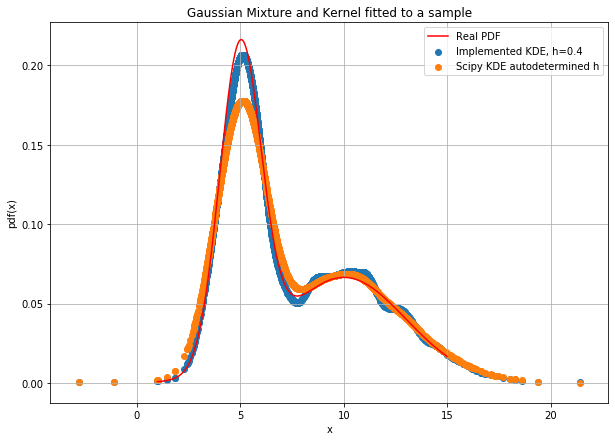

In [194]:
def plot():
    xs = np.arange(1,15,0.01)
    plt.figure(figsize=(10,7))
    plt.plot(xs,x3(xs),'r-',label='Real PDF')
    plt.scatter(sample,kde,label='Implemented KDE, h={}'.format(h))
    plt.scatter(sample,kernel(sample),label='Scipy KDE autodetermined h')
    plt.ylabel('pdf(x)')
    plt.title('Gaussian Mixture and Kernel fitted to a sample')
    plt.xlabel('x')
    plt.legend()
    plt.grid()
    plt.show()

plot()

One can see in the plot that both KDE approximate the underlying probability density function. However scipy KDE used some higher bandwidth that the custom implementation and thus, the custom PDF has higher variance and lower bias than the scipy KDE one. NOTE: Both custom implementation and scipy KDE use standard normal kernels (Gaussian).